# Benchmark serial case

We first load the data and model

In [1]:
import torch
import torch.nn as nn

# Needed for parallel 
from collections import OrderedDict

# For training 
from network_architecture_v2 import MyBertForSequenceClassification

In [2]:
# For fine tuning
from datasets import load_dataset #, load_metric
from transformers import BertTokenizer
from transformers import Trainer, TrainingArguments
import numpy as np

In [4]:
# Load dataset
dataset = load_dataset('glue', 'sst2')

# I believe this is the tokenizer I used... 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples['sentence'], padding="max_length", 
                     max_length=128, truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Load the saved model! 


In [28]:
# Load dictionary
model_dicts = torch.load(f'bert-save-1/model_serial_checkpoint_batch_idx=80000')
new_dict = OrderedDict(model_dicts['model_state'])
# Load actual model 
model_serial = torch.load('serialnet_bert_32')

In [29]:
model_serial.load_state_dict(new_dict)

<All keys matched successfully>

# With model loaded, time to change the final layers

In [30]:
training_serial = MyBertForSequenceClassification(model_serial)

# Define trainers and train

In [10]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=1e-4,
    adam_beta1=0.9,
    adam_beta2=0.988,
    adam_epsilon=1e-6,
    dataloader_drop_last=True,
    warmup_steps=100,
    weight_decay=1e-4,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)


# Load the accuracy metric
# metric = load_metric("accuracy")

# Define the compute metrics function
# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)


In [11]:
# Load the accuracy metric
# metric = load_metric("accuracy")

# Define the compute metrics function
# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)

# Define the compute metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = (predictions == labels).astype(np.float32).mean().item()
    return {"accuracy": accuracy}

In [12]:
# Initialize the Trainer
trainer = Trainer(
    model=training_serial,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics
)


Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [13]:
sum(p.numel() for p in training_serial.parameters() if p.requires_grad)

251241218

In [14]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.261800,0.413982,0.818287
2,0.162600,0.381114,0.856481
3,0.067600,0.473601,0.855324


TrainOutput(global_step=6312, training_loss=0.20517305683944237, metrics={'train_runtime': 6452.0148, 'train_samples_per_second': 31.315, 'train_steps_per_second': 0.978, 'total_flos': 0.0, 'train_loss': 0.20517305683944237, 'epoch': 3.0})

In [15]:
training_serial = MyBertForSequenceClassification(model_serial)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.143700,0.512968,0.825231
2,0.089400,0.420474,0.840278
3,0.049100,0.562908,0.847222


TrainOutput(global_step=6312, training_loss=0.07504460142325747, metrics={'train_runtime': 6506.0405, 'train_samples_per_second': 31.055, 'train_steps_per_second': 0.97, 'total_flos': 0.0, 'train_loss': 0.07504460142325747, 'epoch': 3.0})

In [16]:
# Load dataset
dataset = load_dataset('glue', 'cola')

# I believe this is the tokenizer I used... 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples['sentence'], padding="max_length", 
                     max_length=128, truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

train-00000-of-00001.parquet:   0%|          | 0.00/251k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/37.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8551 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1063 [00:00<?, ? examples/s]

/home/sjiang/braids/pip-test/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/8551 [00:00<?, ? examples/s]

Map:   0%|          | 0/1043 [00:00<?, ? examples/s]

Map:   0%|          | 0/1063 [00:00<?, ? examples/s]

In [17]:
training_serial = MyBertForSequenceClassification(model_serial)


In [21]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=1e-4,
    adam_beta1=0.9,
    adam_beta2=0.988,
    adam_epsilon=1e-6,
    dataloader_drop_last=True,
    warmup_steps=100,
    weight_decay=1e-4,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# Initialize the Trainer
trainer = Trainer(
    model=training_serial,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics
)


Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [22]:
# For COLA
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.630400,0.627361,0.672852
2,0.542800,0.633687,0.656250
3,0.389200,0.732890,0.675781


TrainOutput(global_step=801, training_loss=0.5531222748101576, metrics={'train_runtime': 610.9606, 'train_samples_per_second': 41.988, 'train_steps_per_second': 1.311, 'total_flos': 0.0, 'train_loss': 0.5531222748101576, 'epoch': 3.0})

In [49]:
# Load dataset
dataset = load_dataset('glue', 'mrpc')
training_serial = MyBertForSequenceClassification(model_serial)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples["sentence1"], 
        examples["sentence2"], 
        padding="max_length", 
        truncation=True,
        max_length=256
    )
    
tokenized_datasets = dataset.map(tokenize_function, batched=True)



In [50]:
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

In [51]:
# Load dictionary
model_dicts = torch.load(f'bert-save-1/model_serial_checkpoint_batch_idx=80000')
new_dict = OrderedDict(model_dicts['model_state'])
# Load actual model 
model_serial = torch.load('serialnet_bert_32')

model_serial.load_state_dict(new_dict)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    adam_beta1=0.9,
    adam_beta2=0.988,
    adam_epsilon=1e-8,
    dataloader_drop_last=True,
    warmup_steps=5,
    weight_decay=1e-4,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# Initialize the Trainer
trainer = Trainer(
    model=training_serial,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics
)


Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [52]:
# For MRPC
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.572900,0.586148,0.690000
2,0.582800,0.575732,0.715000
3,0.471800,0.658047,0.720000
4,0.299000,0.803086,0.722500
5,0.099200,0.993084,0.717500


TrainOutput(global_step=1145, training_loss=0.42803376460179493, metrics={'train_runtime': 1160.807, 'train_samples_per_second': 15.799, 'train_steps_per_second': 0.986, 'total_flos': 0.0, 'train_loss': 0.42803376460179493, 'epoch': 5.0})

In [60]:
from transformers import get_linear_schedule_with_warmup
optimizer = trainer.optimizer

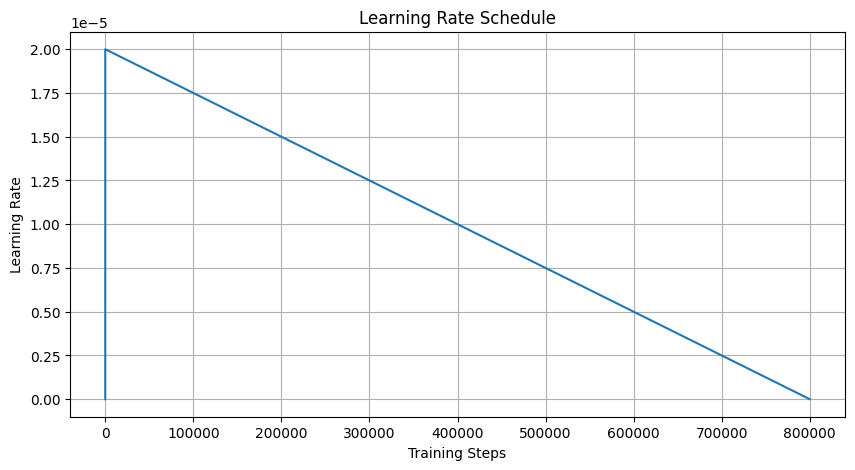

In [70]:
optim_schedule = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=10,  # Number of warmup steps
    num_training_steps=800000   # Total number of training steps
)

from matplotlib import pyplot as plt
learning_rates = []
for step in range(800000):
    # Get the learning rate for the current step
    lr = optim_schedule.get_lr()[0]  # Get the learning rate for the first parameter group
    learning_rates.append(lr)
    
    # Step the scheduler
    optim_schedule.step()

# Plot the learning rate schedule
plt.figure(figsize=(10, 5))
plt.plot(learning_rates)
plt.title('Learning Rate Schedule')
plt.xlabel('Training Steps')
plt.ylabel('Learning Rate')
plt.grid()
plt.show()

In [64]:
optim_schedule
optim_schedule.state_dict()

{'base_lrs': [2e-05, 2e-05],
 'last_epoch': 0,
 'verbose': False,
 '_step_count': 1,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.0, 0.0],
 'lr_lambdas': [{}, {}]}

In [67]:
optim_schedule.step()
optim_schedule.state_dict()

{'base_lrs': [2e-05, 2e-05],
 'last_epoch': 3,
 'verbose': False,
 '_step_count': 4,
 '_get_lr_called_within_step': False,
 '_last_lr': [6e-06, 6e-06],
 'lr_lambdas': [{}, {}]}

In [ ]:
optimizer.state_dict()